In [532]:
import pandas as pd

In [533]:
df=pd.read_csv('train.csv')
df.shape

(1460, 81)

In [534]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

C:\Users\Alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


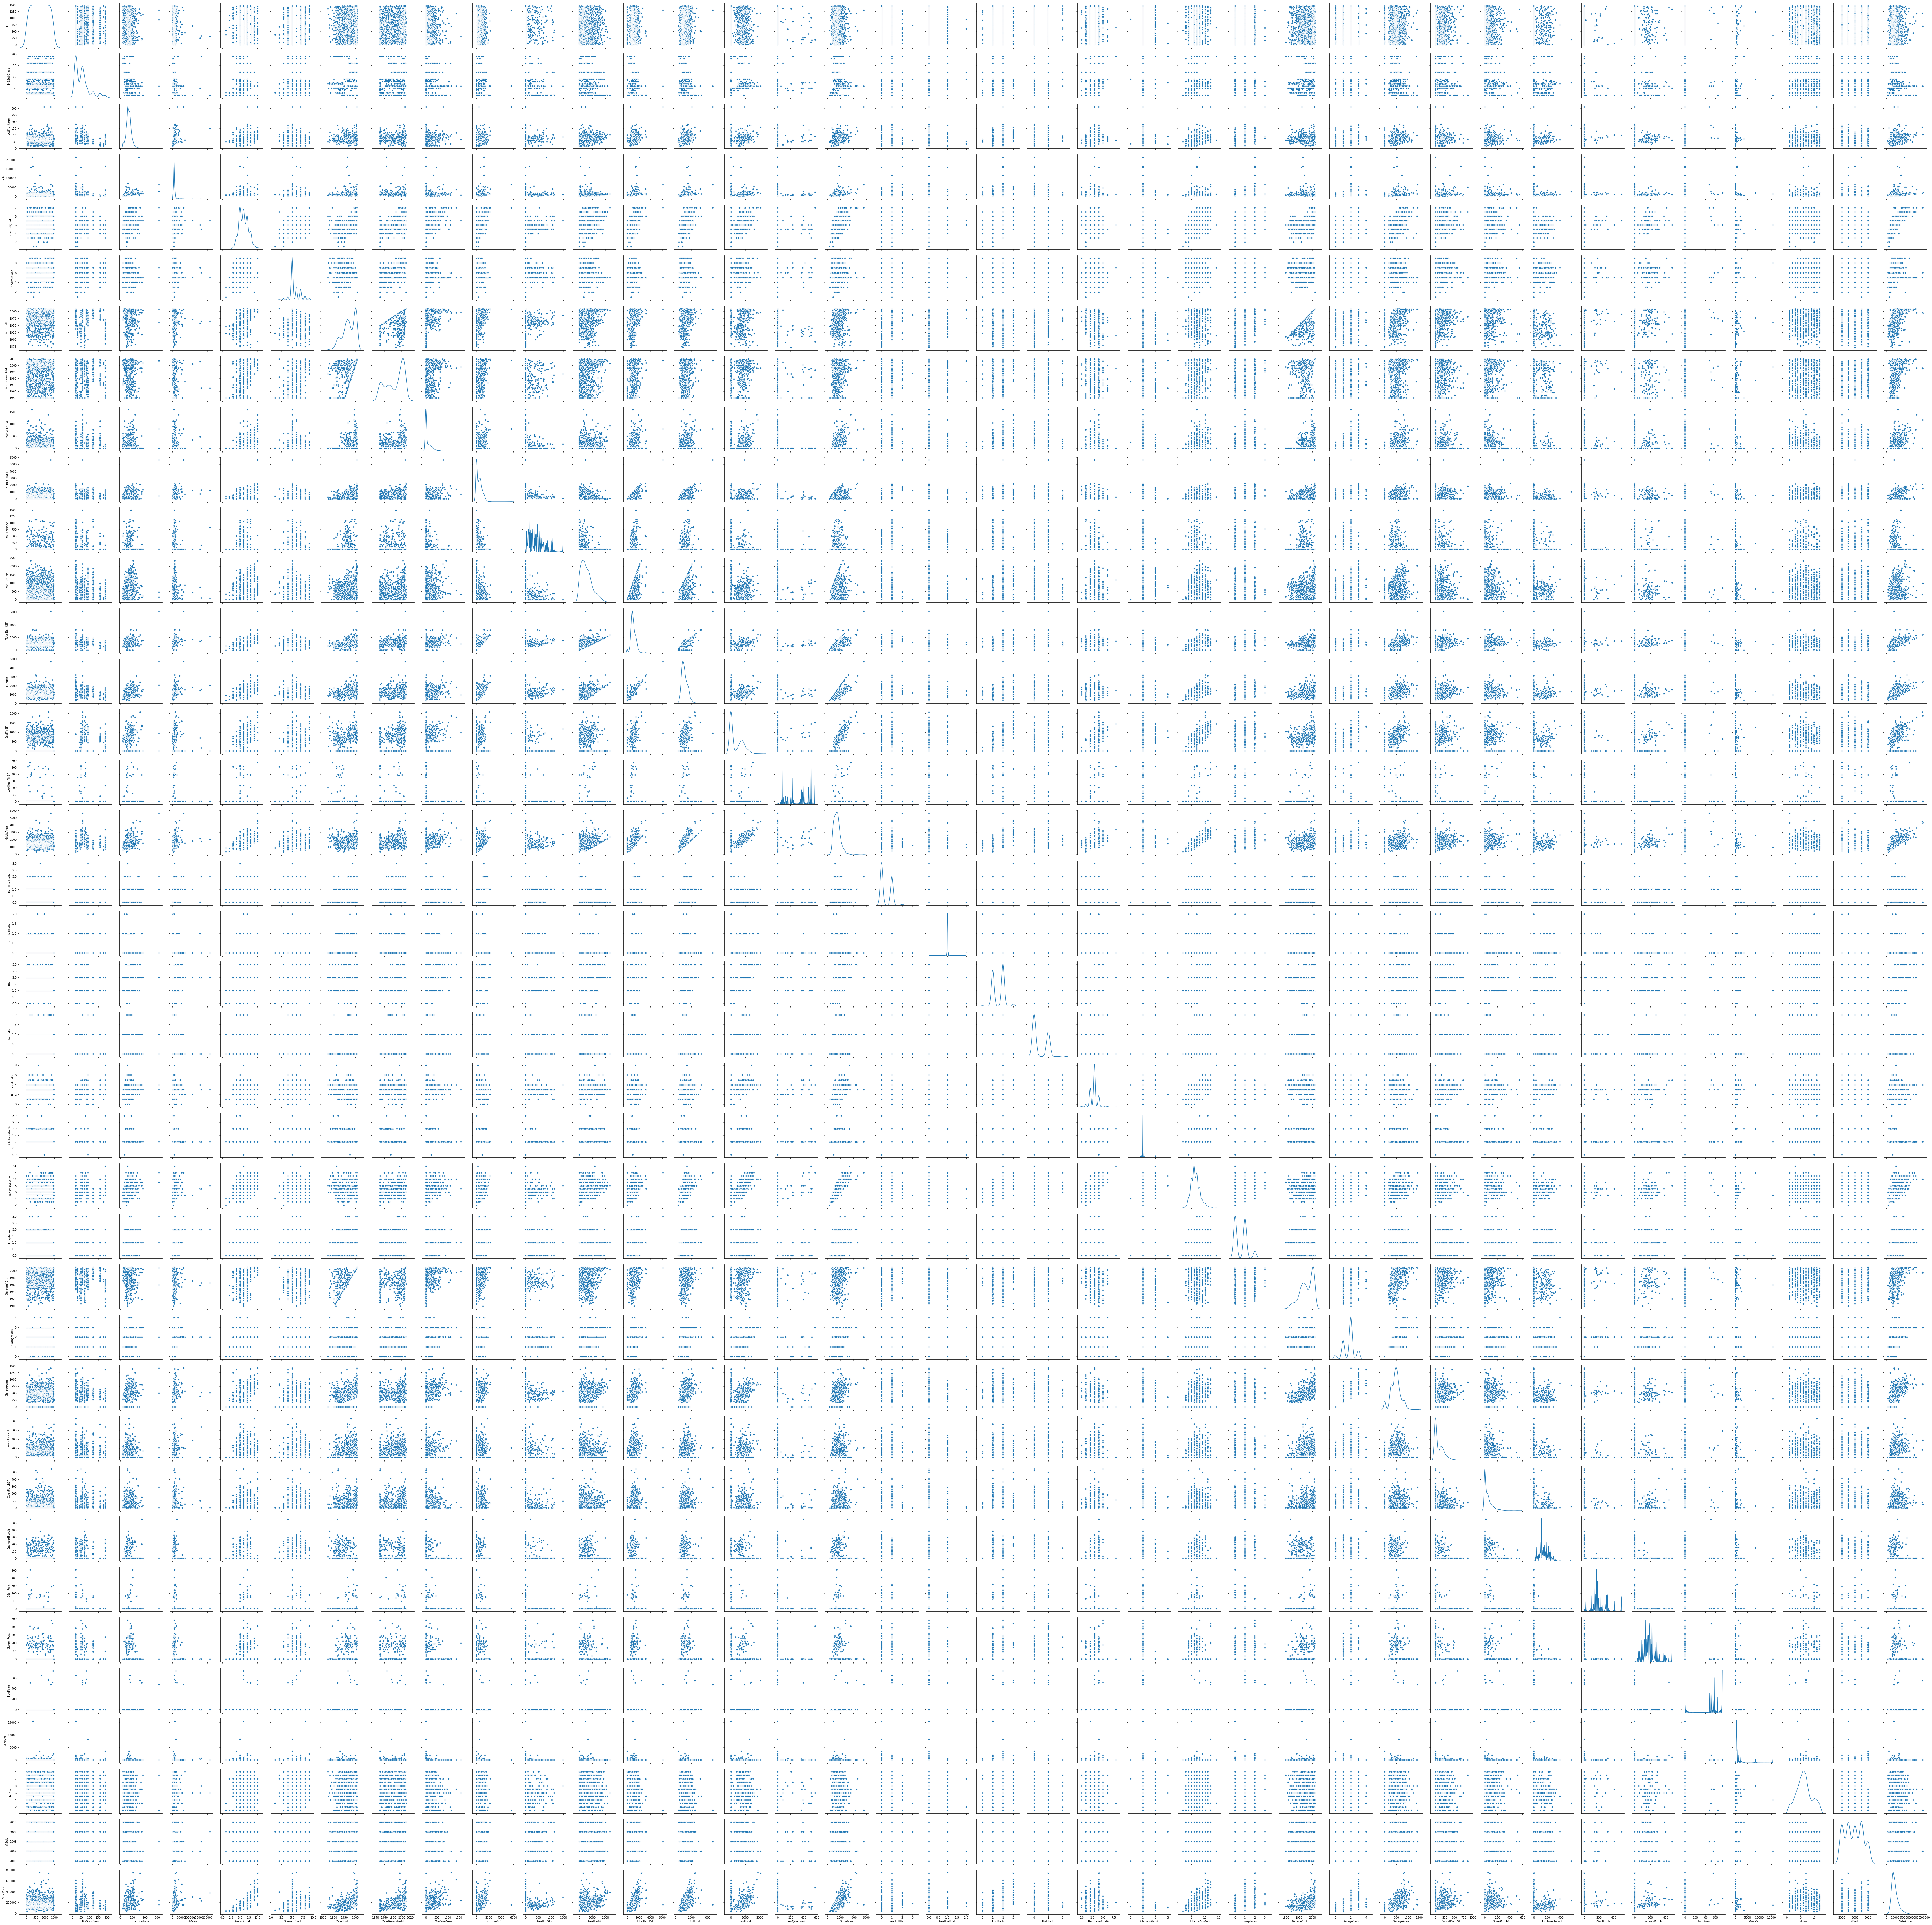

In [381]:
#import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [444]:
df=df.drop('Id',axis=1)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Removing Less Freq Columns

In [446]:
print(df.columns[(df.isnull().mean()>0.2)])
df=df.drop(df.columns[(df.isnull().mean()>0.2)],axis=1)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


Creating Ordinal variables

In [447]:
mapper = {np.NaN :0, 'Po':1,  'Fa':2,'TA':3,'Gd':4,'Ex':5}
df['BsmtQual']=df['BsmtQual'].replace(mapper).astype(int)
df['BsmtCond']=df['BsmtCond'].replace(mapper).astype(int)
df['HeatingQC']=df['HeatingQC'].replace(mapper).astype(int)
df['KitchenQual']=df['KitchenQual'].replace(mapper).astype(int)
df['GarageQual']=df['GarageQual'].replace(mapper).astype(int)
df['GarageCond']=df['GarageCond'].replace(mapper).astype(int)
df['ExterQual']=df['ExterQual'].replace(mapper).astype(int)
df['ExterCond']=df['ExterCond'].replace(mapper).astype(int)



mapper = {np.NaN :0, 'No':1,  'Mn':2,'Av':3,'Gd':4}
df['BsmtExposure']=df['BsmtExposure'].replace(mapper).astype(int)

mapper = {np.NaN :0, 'Unf':1,  'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
df['BsmtFinType1']=df['BsmtFinType1'].replace(mapper).astype(int)
df['BsmtFinType2']=df['BsmtFinType2'].replace(mapper).astype(int)

mapper = {np.NaN :0, 'Detchd':1,  'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6}
df['GarageType']=df['GarageType'].replace(mapper).astype(int)


mapper = {np.NaN :0, 'Unf':1,  'RFn':2,'Fin':3}
df['GarageFinish']=df['GarageFinish'].replace(mapper).astype(int)



df['Electrical'][df.Electrical.isnull()]=df.Electrical.mode().values[0]
mapper = {'FuseP' :0, 'Mix':0,  'FuseF':1,'FuseA':2,'SBrkr':1}
df['Electrical']=df['Electrical'].replace(mapper).astype(int)

mapper = {'N' :0, 'Y':1}
df['CentralAir']=df['CentralAir'].replace(mapper).astype(int)

mapper={'IR3':0,'IR2':1,'IR2':2,'IR1':3,'Reg':4}
df['LotShape']=df['LotShape'].replace(mapper).astype(int)

mapper={'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}
df['Utilities']=df['Utilities'].replace(mapper).astype(int)

mapper={'Gtl':0,'Mod':1,'Sev':2}
df['LandSlope']=df['LandSlope'].replace(mapper).astype(int)

mapper={'N':0,'P':1,'Y':2}
df['PavedDrive']=df['PavedDrive'].replace(mapper).astype(int)

mapper={'Grvl':0,'Pave':1}
df['Street']=df['Street'].replace(mapper).astype(int)

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [448]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [449]:

df['MasVnrType'].value_counts()
df['MasVnrType'][df['MasVnrType'].isnull()]=None
df['MasVnrType']=df['MasVnrType'].astype(str)

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [450]:
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1201 non-null float64
MasVnrArea     1452 non-null float64
GarageYrBlt    1379 non-null float64
dtypes: float64(3)
memory usage: 34.3 KB


In [451]:
df.LotFrontage[df.LotFrontage.isnull()]=df.LotFrontage.median()
df.MasVnrArea[df.MasVnrArea.isnull()]=df.MasVnrArea.median()
df.GarageYrBlt[df.GarageYrBlt.isnull()]=df.GarageYrBlt.median()

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [452]:
type(df['ExterQual'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int32
LotShape         1460 non-null int32
LandContour      1460 non-null object
Utilities        1460 non-null int32
LotConfig        1460 non-null object
LandSlope        1460 non-null int32
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-nu

In [453]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [454]:
df.Electrical.value_counts()

1    1362
2      94
0       4
Name: Electrical, dtype: int64

In [455]:
df.Electrical.isnull().any()

False

In [456]:
df.columns[df.isnull()]

IndexError: too many indices for array

In [457]:
df['MasVnrType'][df['MasVnrType'].isnull()]=df.MasVnrType.mode().values[0]

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [458]:
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

In [459]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [460]:
df.columns[df.dtypes=='object']

Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Functional', 'SaleType', 'SaleCondition'],
      dtype='object')

In [461]:
dummies=pd.get_dummies(df,columns=df.columns[df.dtypes=='object'])
dummies.shape

(1460, 209)

In [462]:
dummies.describe().T

count          mean          std     min      25%  \
MSSubClass             1460.0     56.897260    42.300571    20.0    20.00   
LotFrontage            1460.0     69.863699    22.027677    21.0    60.00   
LotArea                1460.0  10516.828082  9981.264932  1300.0  7553.50   
Street                 1460.0      0.995890     0.063996     0.0     1.00   
LotShape               1460.0      3.584932     0.617579     0.0     3.00   
Utilities              1460.0      2.998630     0.052342     1.0     3.00   
LandSlope              1460.0      0.062329     0.276232     0.0     0.00   
OverallQual            1460.0      6.099315     1.382997     1.0     5.00   
OverallCond            1460.0      5.575342     1.112799     1.0     5.00   
YearBuilt              1460.0   1971.267808    30.202904  1872.0  1954.00   
YearRemodAdd           1460.0   1984.865753    20.645407  1950.0  1967.00   
MasVnrArea             1460.0    103.117123   180.731373     0.0     0.00   
ExterQual              1460.0      3.395890     0.574280     2.0     3.00   
ExterCond              1460.0      3.083562     0.351054     1.0     3.00   
BsmtQual               1460.0      3.489041     0.876478     0.0     3.00   
BsmtCond               1460.0      2.934932     0.552159     0.0     3.00   
BsmtExposure           1460.0      1.630137     1.067391     0.0     1.00   
BsmtFinType1           1460.0      3.545890     2.107776     0.0     1.00   
BsmtFinSF1             1460.0    443.639726   456.098091     0.0     0.00   
BsmtFinType2           1460.0      1.247260     0.892332     0.0     1.00   
BsmtFinSF2             1460.0     46.549315   161.319273     0.0     0.00   
BsmtUnfSF              1460.0    567.240411   441.866955     0.0   223.00   
TotalBsmtSF            1460.0   1057.429452   438.705324     0.0   795.75   
HeatingQC              1460.0      4.145205     0.959501     1.0     3.00   
CentralAir             1460.0      0.934932     0.246731     0.0     1.00   
Electrical             1460.0      1.061644     0.251727     0.0     1.00   
1stFlrSF               1460.0   1162.626712   386.587738   334.0   882.00   
2ndFlrSF               1460.0    346.992466   436.528436     0.0     0.00   
LowQualFinSF           1460.0      5.844521    48.623081     0.0     0.00   
GrLivArea              1460.0   1515.463699   525.480383   334.0  1129.50   
...                       ...           ...          ...     ...      ...   
Foundation_Stone       1460.0      0.004110     0.063996     0.0     0.00   
Foundation_Wood        1460.0      0.002055     0.045299     0.0     0.00   
Heating_Floor          1460.0      0.000685     0.026171     0.0     0.00   
Heating_GasA           1460.0      0.978082     0.146465     0.0     1.00   
Heating_GasW           1460.0      0.012329     0.110386     0.0     0.00   
Heating_Grav           1460.0      0.004795     0.069100     0.0     0.00   
Heating_OthW           1460.0      0.001370     0.036999     0.0     0.00   
Heating_Wall           1460.0      0.002740     0.052289     0.0     0.00   
Functional_Maj1        1460.0      0.009589     0.097486     0.0     0.00   
Functional_Maj2        1460.0      0.003425     0.058440     0.0     0.00   
Functional_Min1        1460.0      0.021233     0.144209     0.0     0.00   
Functional_Min2        1460.0      0.023288     0.150867     0.0     0.00   
Functional_Mod         1460.0      0.010274     0.100873     0.0     0.00   
Functional_Sev         1460.0      0.000685     0.026171     0.0     0.00   
Functional_Typ         1460.0      0.931507     0.252677     0.0     1.00   
SaleType_COD           1460.0      0.029452     0.169128     0.0     0.00   
SaleType_CWD           1460.0      0.002740     0.052289     0.0     0.00   
SaleType_Con           1460.0      0.001370     0.036999     0.0     0.00   
SaleType_ConLD         1460.0      0.006164     0.078298     0.0     0.00   
SaleType_ConLI         1460.0      0.003425     0.058440     0.0     0.00   
SaleType_ConLw      

In [463]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(df)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [464]:
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

In [465]:
#df=df.drop(['Alley','PoolQC','MiscFeature'],axis=1)
X=dummies.copy()
Y=dummies['SalePrice']
X=X.drop('SalePrice',axis=1)


In [466]:
#X=X.as_matrix(X.columns)

In [467]:
df.SaleCondition=df.SaleCondition.str.slice(0,2)

In [468]:
#Y=Y.as_matrix(['SalePrice'])

In [469]:
from sklearn.ensemble import RandomForestRegressor

In [470]:
model1=RandomForestRegressor(oob_score = True)

In [471]:
model1.fit(X,Y)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [482]:
model1.oob_score_

0.7195459031639563

In [475]:
import pandas as pd
feature_importances = pd.DataFrame(model1.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [541]:
feature_importances.cumsum().head(20)

importance
OverallQual     0.610104
GrLivArea       0.709621
2ndFlrSF        0.764697
TotalBsmtSF     0.795930
1stFlrSF        0.820665
BsmtFinSF1      0.839364
LotArea         0.852645
WoodDeckSF      0.863283
TotRmsAbvGrd    0.873508
GarageArea      0.883591
GarageCars      0.893472
YearBuilt       0.903346
LotFrontage     0.913195
OpenPorchSF     0.919479
GarageYrBlt     0.924420
YearRemodAdd    0.928987
GarageType      0.933298
OverallCond     0.937317
MoSold          0.940873
MasVnrArea      0.944117

In [477]:
pd.DataFrame(feature_importances).to_csv('feature_importances.csv')

In [437]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,100,1000]}


forest_reg=RandomForestRegressor(oob_score=True)
GridSearchCV?
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X,Y)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [ ]:
model1.oob_score_

In [479]:
df=df[['OverallQual',
'GrLivArea',
'2ndFlrSF',
'TotalBsmtSF',
'1stFlrSF',
'BsmtFinSF1',
'LotArea',
'WoodDeckSF',
'TotRmsAbvGrd',
'GarageArea',
'GarageCars',
'YearBuilt',
'LotFrontage',
'OpenPorchSF',
'GarageYrBlt',
'YearRemodAdd',
'GarageType',
'OverallCond',
'MoSold',
'MasVnrArea',
'CentralAir',
'Fireplaces',
'BsmtUnfSF',
'BsmtQual',
'GarageFinish',
'BsmtExposure',
'ExterQual',
'MSSubClass']]

In [531]:
df.shape

AttributeError: 'list' object has no attribute 'shape'

In [535]:
df=df[['OverallQual',
'GrLivArea',
'2ndFlrSF',
'TotalBsmtSF',
'1stFlrSF',
'BsmtFinSF1',
'LotArea',
'WoodDeckSF',
'TotRmsAbvGrd',
'GarageArea',
'GarageCars',
'YearBuilt',
'LotFrontage',
'OpenPorchSF',
'GarageYrBlt',
'YearRemodAdd',
'GarageType',
'OverallCond',
'MoSold',
'MasVnrArea']]

In [536]:
model2=RandomForestRegressor(oob_score = True)
X=df
model2.fit(X,Y)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Attchd'

In [481]:
model2.oob_score_

0.7560532320175894

In [530]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1460]

In [497]:
model3=RandomForestRegressor()
model3.fit(X_train,Y_train)
print(model3.score(X_test,Y_test))
print(model3.score(X_train,Y_train))

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8676189949384475
0.9687395523513637


In [517]:
param_grid={'n_estimators':[250,300,350],'min_samples_leaf':[5,10,15]}
forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train,Y_train)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [250, 300, 350], 'min_samples_leaf': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [518]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [519]:
grid_search.score(X_test,Y_test)

-1041246323.3043038

In [520]:
grid_search.score(X_train,Y_train)

-434457241.4596981

In [521]:
score=cross_validate(grid_search,X,Y,cv=5,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation

In [522]:
score

{'fit_time': array([ 95.35671091,  97.60831285, 101.87665915,  99.79195285,
         96.97770524]),
 'score_time': array([0.07895064, 0.08794618, 0.0869453 , 0.08794641, 0.06895661]),
 'test_r2': array([0.86940161, 0.84584474, 0.82173852, 0.87376482, 0.79040919]),
 'train_r2': array([0.92524599, 0.93305631, 0.88911371, 0.92578527, 0.93650814]),
 'test_neg_mean_squared_error': array([-7.22552567e+08, -1.01290333e+09, -1.35082950e+09, -6.39489125e+08,
        -1.40538381e+09]),
 'train_neg_mean_squared_error': array([-4.85910038e+08, -4.17695083e+08, -6.63639019e+08, -4.89651381e+08,
        -3.94068286e+08])}

In [524]:
model3=RandomForestRegressor(n_estimators=300,min_samples_leaf=5)
print(model3.fit(X_train,Y_train))
print(model3.score(X_test,Y_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.861091720016221


In [525]:
print(model3.score(X_train,Y_train))

0.927784178953603


In [492]:
from sklearn.model_selection import cross_validate
cross_validate?

In [494]:
score=cross_validate(model3,X,Y,cv=5,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [495]:
score

{'fit_time': array([0.18388224, 0.15890312, 0.15090585, 0.15590215, 0.16089773]),
 'score_time': array([0.00599718, 0.00599647, 0.00699544, 0.0079968 , 0.00699949]),
 'test_r2': array([0.84539325, 0.82570551, 0.84809729, 0.88978405, 0.77800232]),
 'train_r2': array([0.96933359, 0.97624759, 0.97372079, 0.96015243, 0.97171238]),
 'test_neg_mean_squared_error': array([-8.55381932e+08, -1.14523156e+09, -1.15108808e+09, -5.58338006e+08,
        -1.48857650e+09]),
 'train_neg_mean_squared_error': array([-1.99335356e+08, -1.48203154e+08, -1.57277406e+08, -2.62904936e+08,
        -1.75569814e+08])}